# Présentation des classifieurs

In [1]:
import pickle
import numpy as np
import pandas as pd

L_tweet_cible=pickle.load(open('L_IdTextCible.p','rb'))
L_text_cible=np.array(list(L_tweet_cible.values()))[:,0]
pred1=pickle.load(open('pred_text_cible_preprocess1_07.p','rb'))
pred2=pickle.load(open('pred_text_cible_preprocess2_07.p','rb'))
pred3=pickle.load(open('pred_text_cible_preprocess3_07.p','rb'))


In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Classifieur 1
### pré-traitements : transformation des pseudos non négatifs, conservation des hashtags,conservation des RT.
### max_features=15000, min_df=2, max_df=0.7, ngram_range=(1,2)
### score en test : 97 %


#### Des prédictions très déséquilibrées

In [13]:
print('nombre de prédictions positives',len(np.where(pred1=='1')[0]))
print('nombre de prédictions négatives',len(np.where(pred1=='-1')[0]))

nombre de prédictions positives 1173770
nombre de prédictions négatives 863552


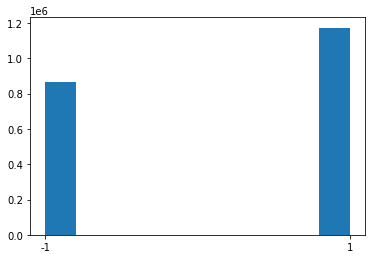

In [3]:
plt.hist(pred1)
#plt.xlabel("polarité")
#plt.title("Prédictions du classifieur 1")
plt.show()

In [11]:
import pickle
import numpy as np

clf=pickle.load(open("clf_svm1_07complet.p","rb"))
features1=pickle.load(open("features1_07complet.p","rb"))
features1=np.array(features1)
w=list(clf.coef_)[0] #liste des poids
ind_w=np.argsort(-np.abs(w)) # liste des indices de poids triés par ordre décroissants
print ('les 20 plus grand poids :',w[ind_w[0:20]])
feat_top=features1[ind_w[0:100]]


def makeImage(text):
    
    wc = WordCloud(background_color="white", max_words=100)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()


les 20 plus grand poids : [10.77502704 -9.77525175 -8.14443536  7.17662055 -7.01740578 -6.89937568
 -6.12664099 -5.32784013 -5.29289145 -5.24274699  4.53488772 -4.48408837
 -4.38993572 -4.37486529 -4.37288559  4.23539835 -4.07463947 -3.87619662
  3.78104009 -3.73727017]


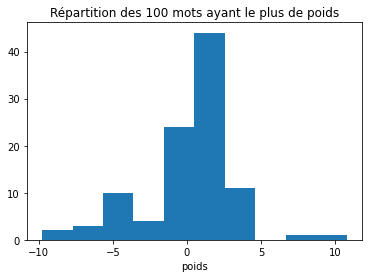

In [12]:
plt.hist(w[ind_w[0:100]])
plt.xlabel("poids")
plt.title("Répartition des 100 mots ayant le plus de poids")
plt.show()

#### Mots importants du classifieur 1

les 100 premiers mots clés
 ['jevotefillon' 'emmanuelholland' 'fillongat' 'jevotemacron' 'stopmacron'
 'imposturemacron' 'penelopegat' 'macronpiegeacon' 'levraimacron'
 'barbaralefebvr' 'jechoisislepen' 'penelopefillon' 'toutsaufmacron'
 'poissonmacron' 'penelop' 'macronpresident' 'levraifillon' 'macrongat'
 'votemacron' 'macronarrier' 'melenchonauemetourcestpossibl' 'joursheur'
 'enmarchearrier' 'imposturemacron stopmacron'
 'stopmacron imposturemacron' 'stopmacron emmanuelholland'
 'imposturemacron emmanuelholland' 'jevotefillon jevotefillon'
 'emmanuelhollande stopmacron' 'legoutdubonheur'
 'emmanuelhollande imposturemacron' 'fillongate lien_url'
 'fillon tousfillon' 'jechoisismarin' 'lepen' 'melenchon' 'demission'
 'stopmacron macrongat' 'imposturemacron macronpiegeacon'
 'macrongate emmanuelholland' 'fillongate penelopegat'
 'lepencestlaruine lien_url' 'toutsaufmacron emmanuelholland'
 'macronitude imposturemacron' 'stopmacron toutsaufmacron'
 'stopmacron enmarchearrier' 'fillon f

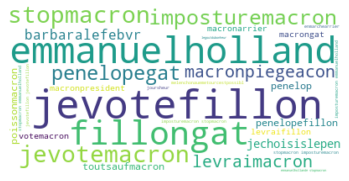

In [15]:
print('les 100 premiers mots clés\n',feat_top)
dico=dict()
for i in range (100):
    dico[feat_top[i]]=abs(w[ind_w[i]])
makeImage(dico)

## Classifieur 2
### pré-traitements : transformation des pseudos non négatifs, suppression des hashtags,conservation des RT.
### max_features=15000, min_df=2, max_df=0.7, ngram_range=(1,2)
### score en test : 90,7 %


#### Prédictions assez équilibrées

nombre de prédictions positives 990946
nombre de prédictions négatives 1046376


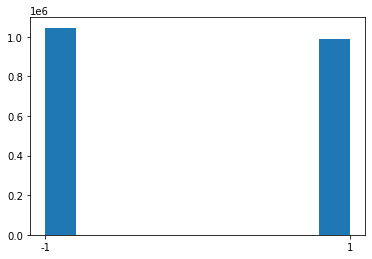

In [4]:
print('nombre de prédictions positives',len(np.where(pred2=='1')[0]))
print('nombre de prédictions négatives',len(np.where(pred2=='-1')[0]))
plt.hist(pred2)
#plt.xlabel("polarité")
#plt.title("Prédictions du classifieur 2")
plt.show()

les 20 plus grand poids : [-4.24493933 -4.047552   -3.83316398 -3.63333509  3.61849229 -3.61732005
  3.48934744 -3.48914101 -3.44727157  3.41947529 -3.3752181  -3.3191167
  3.31641138  3.269007   -3.24678704  3.15843755  3.12848179  3.12324802
 -3.11918588 -3.06156891]


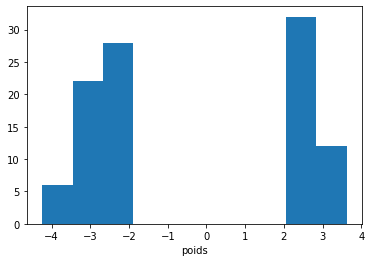

In [28]:
import pickle
import numpy as np

clf=pickle.load(open("clf_svm2_07complet.p","rb"))
features1=pickle.load(open("features2_07complet.p","rb"))
features1=np.array(features1)
w=list(clf.coef_)[0] #liste des poids
ind_w=np.argsort(-np.abs(w)) # liste des indices de poids triés par ordre décroissants
print ('les 20 plus grand poids :',w[ind_w[0:20]])
feat_top=features1[ind_w[0:100]]
plt.hist(w[ind_w[0:100]])
plt.xlabel("poids")
#plt.title("Répartition des 100 mots ayant le plus de poids")
plt.show()

les 100 premiers mots clés
 ['utile altern' 'rt manuel_holland' 'france mak' 'vie baiss'
 'coucou soutien' 'rt insoum' 'rt francaisdital' 'nabab mesur'
 'rt ladvocatus' 'dame fr' 'gravissim' 'rt nomacron' 'macron principal'
 'voyageursbrazil macron' 'rt aalvityl' 'rt macron' 'lache rien'
 'vote droit' 'attrape tout' 'mirag' 'emacron_' 'rt quarti' 'recent'
 'etre m' 'rt mmelenv' 'banquier illegal' 'lagoshnick c' 'rt apostill'
 'rt annick_chupin' 'rt lagoshnick' 'projet coherent' 'rt fleurflorian'
 'non medi' 'rt bcn_h' 'dupont' 'rt jeunesmacron' 'rt nicolasmiguet'
 'rt louisedethervet' 'rt mapicos' 'rt sandrafellows_' 'rt niniricou'
 'rt tendancesmusic' 'apres cet' 'mentent' 'fort macron' 'france doit'
 'histoire fr' 'nouveau souffl' 'etre pr' 'nrenard' 'campagne ant'
 'lafrancematu' 'isamergault' 'capric' 'rt patriotevendeen'
 'rt gaucherpatric' 'votera francoisfillon' 'maxence quand' 'fictiv'
 'recuper' 'quoi parl' 'euros augment' 'rt lugdulu'
 'arnaudlepage francoisfillon' 'macron ve

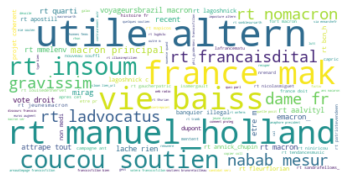

In [8]:
print('les 100 premiers mots clés\n',feat_top)
dico=dict()
for i in range (100):
    dico[feat_top[i]]=abs(w[ind_w[i]])
makeImage(dico)

## Classifieur 3
### pré-traitements : transformation des pseudos non négatifs, suppression des hashtags,suppression des RT.
### max_features=15000, min_df=2, max_df=0.7, ngram_range=(1,2)
### score en test : 88,8 %¶


#### Prédictions assez équilibrées

nombre de prédictions positives 993558
nombre de prédictions négatives 1043764


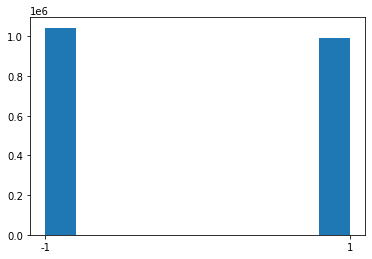

In [5]:
print('nombre de prédictions positives',len(np.where(pred3=='1')[0]))
print('nombre de prédictions négatives',len(np.where(pred3=='-1')[0]))
plt.hist(pred3)
#plt.xlabel("polarité")
#plt.title("Prédictions du classifieur 3")
plt.show()

les 20 plus grand poids : [-4.64309121 -3.95816976 -3.84279189 -3.71741504  3.61290303  3.52373795
  3.49023368 -3.36329299 -3.33946144 -3.33179962  3.27434386 -3.1004158
  3.02989812 -3.00708647 -2.99352772  2.98558343 -2.98302399  2.94703394
 -2.93686501  2.92937836]


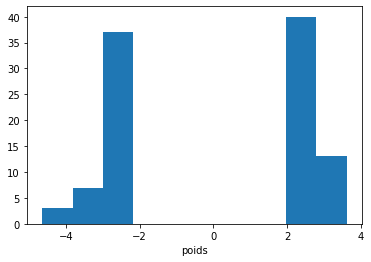

In [29]:
import pickle
import numpy as np

clf=pickle.load(open("clf_svm3_07complet.p","rb"))
features1=pickle.load(open("features3_07complet.p","rb"))
features1=np.array(features1)
w=list(clf.coef_)[0] #liste des poids
ind_w=np.argsort(-np.abs(w)) # liste des indices de poids triés par ordre décroissants
print ('les 20 plus grand poids :',w[ind_w[0:20]])
feat_top=features1[ind_w[0:100]]
plt.hist(w[ind_w[0:100]])
plt.xlabel("poids")
#plt.title("Répartition des 100 mots ayant le plus de poids")
plt.show()

les 100 premiers mots clés
 ['france mak' 'vie baiss' 'gravissim' 'quelques soutien' 'lache rien'
 'ca holland' 'dame fr' 'verite galax' 'bol lien_url' 'apres cet'
 'contrepoint' 'denoncer impostur' 'mettre term' 'banquier illegal'
 'melenchon raison' 'candidat seri' 'hollande deguis' 'macron principal'
 'esbrouf' 'non medi' 'capitalisme lien_url' 'histoire fr' 'personne veut'
 'rappellera jam' 'utile altern' 'fort macron' 'adherents enmarchefr'
 'galax' 'soutiens parlent' 'developp' 'frontali' 'partout v'
 'fils lien_url' 'tous ministr' 'fictiv' 'nouveau souffl' 'webradio'
 'nicolasframont' 'impuiss' 'asselineau parl' 'appellent' 'capric'
 'emacron_' 'ensemble ver' 'degage francoisfillon' 'ali' 'isamergault'
 'camp macron' 'ha lien_url' 'soir ' 'faire voir' 'detruit pay'
 'mieux vaut' 'med' 'seduit' 'position clair' 'cette cl' 'si pens'
 'porte port' 'rebaptis' 'yumbo' 'remunere' 'fillon marseil' 'macron ver'
 'ocean malheur' 'imposteur macron' 'veux plus' 'euros augment'
 'immigratio

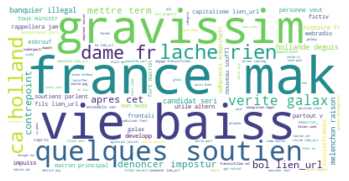

In [10]:
print('les 100 premiers mots clés\n',feat_top)
dico=dict()
for i in range (100):
    dico[feat_top[i]]=abs(w[ind_w[i]])
makeImage(dico)

# Comparaison des classifieurs

In [9]:
from sklearn.utils import shuffle
import random

text,polarite1,polarite2,polarite3 = shuffle(L_text_cible,pred1,pred2,pred3)

def Evaluation_pred(text,polarite1,polarite2,polarite3,nombre):
    reponses=[]
    hasard=[]
    for i in range(nombre):
        print(text[i])
        r=input('quelle est la polarité du tweet?')
        h=random.choice([-1,1])
        hasard.append(str(h))
        reponses.append(str(r))
    reponses=np.array(reponses)
    hasard=np.array(hasard)
    if len(np.where(reponses=='1')[0])>nombre/2:
        majoritaire = '1'
    else :
        majoritaire = '-1'
    polarite1=polarite1[0:nombre]
    polarite2=polarite2[0:nombre]
    polarite3=polarite3[0:nombre]
    score_classifieur1 = np.mean(reponses==polarite1)
    score_classifieur2 = np.mean(reponses==polarite2)
    score_classifieur3 = np.mean(reponses==polarite3)
    score_hasard = np.mean(reponses==hasard)
    score_majoritaire = np.mean (reponses == majoritaire)
    df=pd.DataFrame([[nombre,score_classifieur1,score_classifieur2,score_classifieur3,score_hasard,score_majoritaire]],columns=['nombre de tests','score_classifieur1','score_classifieur2','score_classifieur3','score_hasard','score_majoritaire'])
    return df,reponses,polarite1,polarite2,polarite3


In [39]:
df,reponses,polarite1,polarite2,polarite3= Evaluation_pred(text,polarite1,polarite2,polarite3,50)

RT @BellaKilburn25: #Mlp2017 #MarinePresidente #Marine2017 #MadameLaPresidente #Image #Frexit #UneFemmeALaPresidence #LesFemmesAvecLep http…
quelle est la polarité du tweet?1
RT @MISSBLISSTER: Très bon doc pour comprendre l'arnaque #macron et la #mondialisation heureuse. A partager sans modération  https://t.co/J…
quelle est la polarité du tweet?-1
RT @Jeunes_Fillon62: Avec @FrancoisFillon, œuvrons pour la sécurité des français. 
#Fillon2017 ???? https://t.co/MHeiwn7gkf
quelle est la polarité du tweet?1
RT @bng2617: @Sarkoziste @nathanou @FrancoisFillon Je ne fais que ça,@Sarkoziste depuis mon réveil !???#NoFIllon #FillonGate… 
quelle est la polarité du tweet?-1
RT @TherezeDakin: Quand #Macron sort les comptes fakes pour avoir des retweets. #Pipeautage

#EnMarche https://t.co/Cuatxd8seH
quelle est la polarité du tweet?1
#ImpostureMacron https://t.co/YwTfNtDNJ9
quelle est la polarité du tweet?-1
RT @JeunesAvecHamon: Alors, où est la dynamique ? Mieux que les sondages : les citoyen.ne.s 

In [40]:
df.head()

,nombre de tests,score_classifieur1,score_classifieur2,score_classifieur3,score_hasard,score_majoritaire
0,50,0.66,0.74,0.78,0.58,0.56


In [45]:
df,reponses,polarite1,polarite2,polarite3= Evaluation_pred(text,polarite1,polarite2,polarite3,50)

RT @K_Betesh: Grand meeting de Marine à Paris ce lundi à 20h au Zenith de Paris, soyez au rendez-vous ! ?? #Marine2017 https://t.co/HxASynH…
quelle est la polarité du tweet?1
RT @tropical_boy: #fillon 
la remontada du candidat , l'enthousiasme et la folie se manifestent pendant les meetings du candidat de l… 
quelle est la polarité du tweet?1
RT @Eric_Anceau: #Macron se dit de milieu modeste
Son père est prof de neurologie en CHU
Personne ne relève
Des millions de Fçais se laisse…
quelle est la polarité du tweet?-1
RT @AudreyPatriote: C'est rassurant, en 5 ans #Melenchon n'a pas changé ! Un immigrationniste ? ! #JLMMarseille https://t.co/7GRgEbPY32
quelle est la polarité du tweet?1
RT @krunch_fr: Comment les #Macron s'assurent des clichés "avantageux" dans la presse people
https://t.co/LePSTJLFN1
quelle est la polarité du tweet?-1
RT @martelf: Jean-Luc #Mélenchon a toujours considéré que le #Venezuela était son modèle politique. Chaque jour la dictature s'y… 
quelle est la polarité du 

In [46]:
df.head()

,nombre de tests,score_classifieur1,score_classifieur2,score_classifieur3,score_hasard,score_majoritaire
0,50,0.72,0.7,0.74,0.58,0.66


### Test Varma

In [7]:
df,reponses,polarite1,polarite2,polarite3= Evaluation_pred(text,polarite1,polarite2,polarite3,50)

RT @ToutSaufMacron: Demain présent à la manifestation contre Macron à #Marseille #EmmanuelHollande ! Pas question, #ToutSaufMacron !!
quelle est la polarité du tweet?-1
RT @jbboursier: #LeGrandDebat «Sans le boulet des affaires, #Fillon se serait baladé dans cette campagne.Il dégage une stature d'ho… 
quelle est la polarité du tweet?1
RT @tprincedelamour: Barbier:"#Macron suit la voie de #Balladur et de #Juppé. Il est sûr de gagner or les gens ne sont par sûrs de voter… 
quelle est la polarité du tweet?1
RT @PierreHV1: Voilà comment ça se passe quand on élit @RobertMenardFR. #Béziers #FN #Ménard https://t.co/TXI2rJXWKM
quelle est la polarité du tweet?-1
RT @francaisdallas: @LCI Et oui, Macron c'est Hollande version hystérique. https://t.co/EXGbHtKwc2 #StopMacron #ToutSaufMacron
quelle est la polarité du tweet?-1
RT @fiasco_peintre: #Macron ratisse tellement large qu'il a une place assurée aux espaces verts de la Mairie de Monaco si il échoue à l'éle…
quelle est la polarité du tweet?-1


In [8]:
df.head()

,nombre de tests,score_classifieur1,score_classifieur2,score_classifieur3,score_hasard,score_majoritaire
0,50,0.5,0.76,0.66,0.36,0.56


In [10]:
df,reponses,polarite1,polarite2,polarite3= Evaluation_pred(text,polarite1,polarite2,polarite3,50)

RT @JLMelenchon: Je demande à M. #Macron de respecter davantage ses adversaires, car l'un d'entre nous sera le prochain président de la Rép…
quelle est la polarité du tweet?-1
RT @Fillon2017_fr: .@BrunoRetailleau face à E. #Macron : "Le pilotage de la politique économique, c'est vous avec François Hollande !"… 
quelle est la polarité du tweet?-1
RT @achabus: #bhrennes Isabelle Thomas a voté la directive secret des affaires trop menaçant de voter contre https://t.co/nXltupqV4K
quelle est la polarité du tweet?1
La sécurité c'est une question mondial. Mieux vivre c'est une préoccupation tout aussi importante #CPol @CarolineFourest @CPolF5 #Hamon2017
quelle est la polarité du tweet?1
RT @sylvainroche: Delahousse sur F2 à Melenchon : vous serez un Président.... Le discours change. Eh oui, il sera Président.  #JLMFrance2
quelle est la polarité du tweet?1
@ThibaudDi plus on aime #Fillon plus on aime mentir, le Thénardier qui a des difficultés à boucler ses fins de mois… https://t.co/lGXuwiPeM

In [11]:
df.head()

,nombre de tests,score_classifieur1,score_classifieur2,score_classifieur3,score_hasard,score_majoritaire
0,50,0.52,0.7,0.7,0.44,0.54
